In [2]:
from functions import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
bounds = pd.read_csv("team_bounds_test_rating_effect.txt")
features = pd.read_csv("rf_features_test.txt")
last_round_matches = pd.read_csv("last_rounds_test_rating_effect.txt")
ranking = pd.read_csv("ranking_test_rating_effect.txt")

In [3]:
bounds = pd.read_csv("team_bounds_test.txt")
features = pd.read_csv("rf_features_test.txt")
last_round_matches = pd.read_csv("last_rounds_test.txt")
ranking = pd.read_csv("ranking.txt")

# **Static Schedules**

## **1. Number of (ir)relevant matches on average in static schedules**

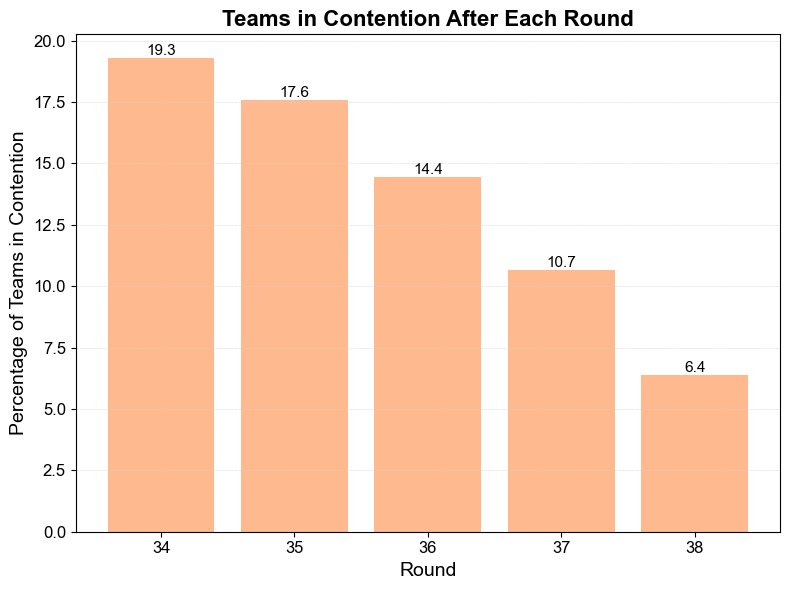

In [ ]:
bounds["in_contention"] = bounds.apply(lambda x: in_contention(x["highest"], x["lowest"]), axis=1)

# calculate the number of teams that are in contention after any given round
teams_in_contention_dict = {}

for i in range(34,39): 
    
    round_i = bounds[bounds["round"] == i]
    number_in_contention = (round_i["in_contention"].sum())/ (len(bounds)/100)
    teams_in_contention_dict[i] = number_in_contention
    
    
# make a line plot of the number of teams that are still in contention after each round
plt.figure(figsize=(8, 6))
bars = plt.bar(teams_in_contention_dict.keys(), teams_in_contention_dict.values(), 
               color='#feb98e', linewidth=1.5)

plt.title('Teams in contention before each round', fontsize=16, fontname='Arial', fontweight='bold')
plt.xlabel('Round', fontsize=14, fontname='Arial')
plt.ylabel('Percentage of Teams in Contention', fontsize=14, fontname='Arial')
plt.grid(axis='y', color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(list(teams_in_contention_dict.keys()), fontsize=12, fontname='Arial')
plt.yticks(fontsize=12, fontname='Arial')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{height:.1f}', ha='center', va='bottom', fontsize=11, fontname='Arial')

plt.tight_layout()
plt.show()

In [ ]:
round_34 = bounds[bounds["round"] == 34]
round_34

,run,team,round,lowest,highest,in_contention
0,0,Liverpool,34,11,3,True
1,0,Arsenal,34,3,1,True
2,0,Tottenham,34,14,4,True
3,0,Newcastle United,34,17,7,True
4,0,Crystal Palace,34,16,5,True
...,...,...,...,...,...,...
99915,999,Man United,34,16,16,False
99916,999,Brentford,34,17,17,False
99917,999,Southampton,34,20,20,False
99918,999,West Ham United,34,18,18,False


In [ ]:
true = round_34[round_34["in_contention"] == True]
false = round_34[round_34["in_contention"] == False]
true.shape[0] / false.shape[0]

0.007455168245013097

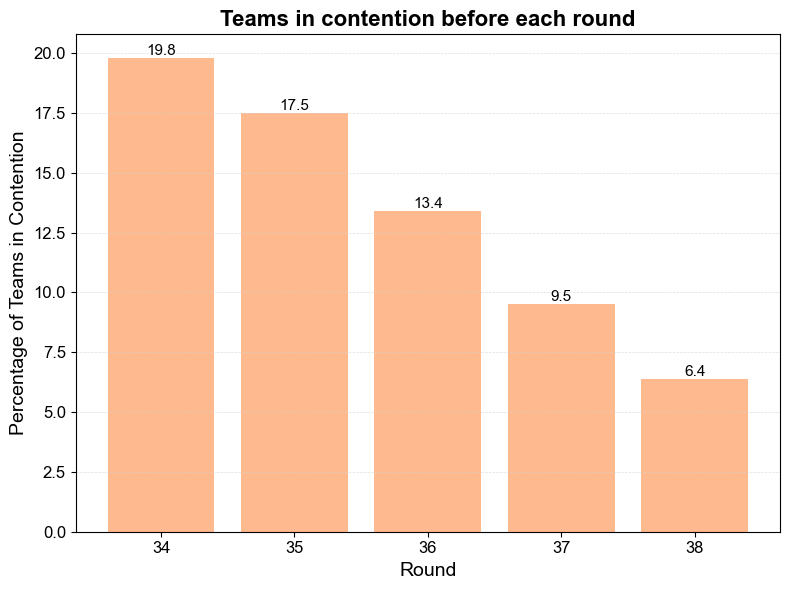

In [32]:
bounds = pd.read_csv("team_bounds_test_rating_effect.txt")

bounds["in_contention"] = bounds.apply(lambda x: in_contention(x["highest"], x["lowest"]), axis=1)

# calculate the number of teams that are in contention after any given round
teams_in_contention_dict = {}

for i in range(34,39): 
    
    round_i = bounds[bounds["round"] == i]
    number_in_contention = (round_i["in_contention"].sum())/ (len(bounds)/100)
    teams_in_contention_dict[i] = number_in_contention
    
    
# make a line plot of the number of teams that are still in contention after each round
plt.figure(figsize=(8, 6))
bars = plt.bar(teams_in_contention_dict.keys(), teams_in_contention_dict.values(), 
               color='#feb98e', linewidth=1.5)

plt.title('Teams in contention before each round', fontsize=16, fontname='Arial', fontweight='bold')
plt.xlabel('Round', fontsize=14, fontname='Arial')
plt.ylabel('Percentage of Teams in Contention', fontsize=14, fontname='Arial')
plt.grid(axis='y', color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(list(teams_in_contention_dict.keys()), fontsize=12, fontname='Arial')
plt.yticks(fontsize=12, fontname='Arial')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{height:.1f}', ha='center', va='bottom', fontsize=11, fontname='Arial')

plt.tight_layout()
plt.show()

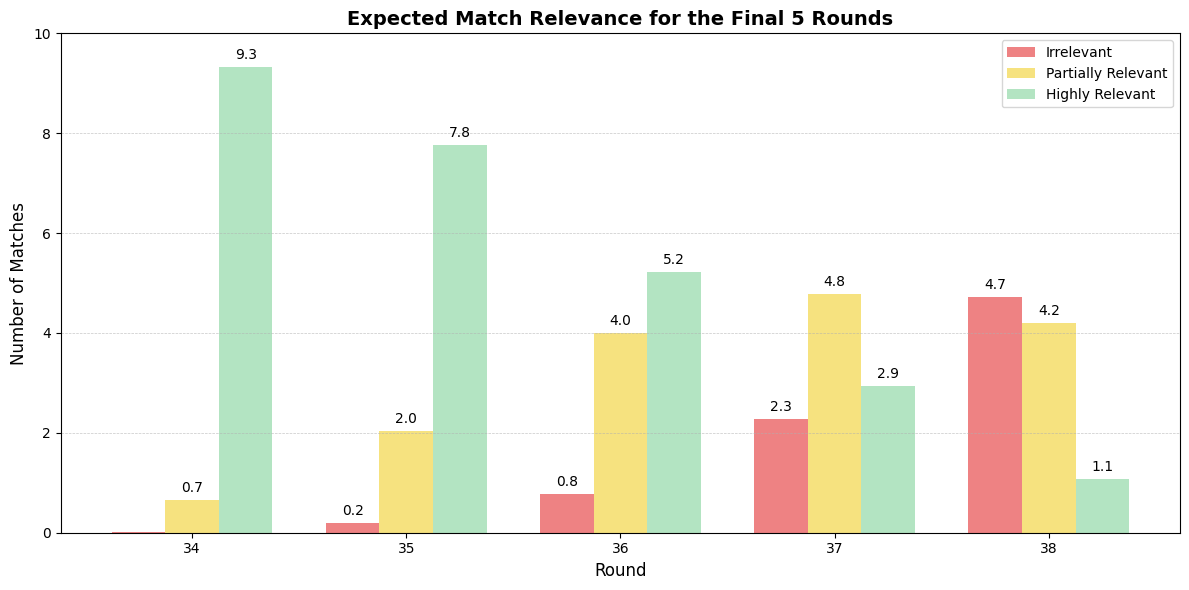

In [46]:
# Step 1: Merge for home team
match_relevances = last_round_matches.merge(
    bounds.rename(columns={'team': 'home_team', 'in_contention': 'home_relevant'}),
    on=['run', 'round', 'home_team'],
    how='left'
)

# Step 2: Merge for away team
match_relevances = match_relevances.merge(
    bounds.rename(columns={'team': 'away_team', 'in_contention': 'away_relevant'}),
    on=['run', 'round', 'away_team'],
    how='left'
)

match_relevances["relevance_type"] = match_relevances.apply(lambda x: x["home_relevant"] + x["away_relevant"], axis=1)
match_relevances.head()

match_relevances_per_round = {}

for i in range(34,39): 
    
    round_i = match_relevances[match_relevances["round"] == i]
    number_highly_relevant = len(round_i[round_i["relevance_type"] == 2]) / (len(bounds)/100)
    number_partially_relevant = len(round_i[round_i["relevance_type"] == 1]) / (len(bounds)/100)
    number_irrelevant = len(round_i[round_i["relevance_type"] == 0]) / (len(bounds)/100)
    
    match_relevances_per_round[i] = {
        "highly_relevant": number_highly_relevant,
        "partially_relevant": number_partially_relevant,
        "irrelevant": number_irrelevant
    }
    
    
rounds = list(match_relevances_per_round.keys())

labels = ['Irrelevant', 'Partially Relevant', 'Highly Relevant']
colors = ['#ee8283', '#f6e27f', '#b3e4c2']  # red, yellow, green (like your chart)

# Values
irrelevant = [match_relevances_per_round[r]['irrelevant'] for r in rounds]
partial = [match_relevances_per_round[r]['partially_relevant'] for r in rounds]
highly = [match_relevances_per_round[r]['highly_relevant'] for r in rounds]

x = np.arange(len(rounds))  # label locations
width = 0.25  # bar width

# Plot
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width, irrelevant, width, label='Irrelevant', color=colors[0])
bars2 = plt.bar(x, partial, width, label='Partially Relevant', color=colors[1])
bars3 = plt.bar(x + width, highly, width, label='Highly Relevant', color=colors[2])

# Add value labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0.05:
            plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, 
                     f'{height:.1f}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Axis and layout
plt.ylabel('Number of Matches', fontsize=12)
plt.xlabel('Round', fontsize=12)
plt.title('Expected Match Relevance for the Final 5 Rounds', fontsize=14, fontweight='bold')
plt.xticks(x, rounds)
plt.ylim(0, 10)
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
bounds["in_contention"] = bounds.apply(lambda x: in_contention(x["highest"], x["lowest"]), axis=1)

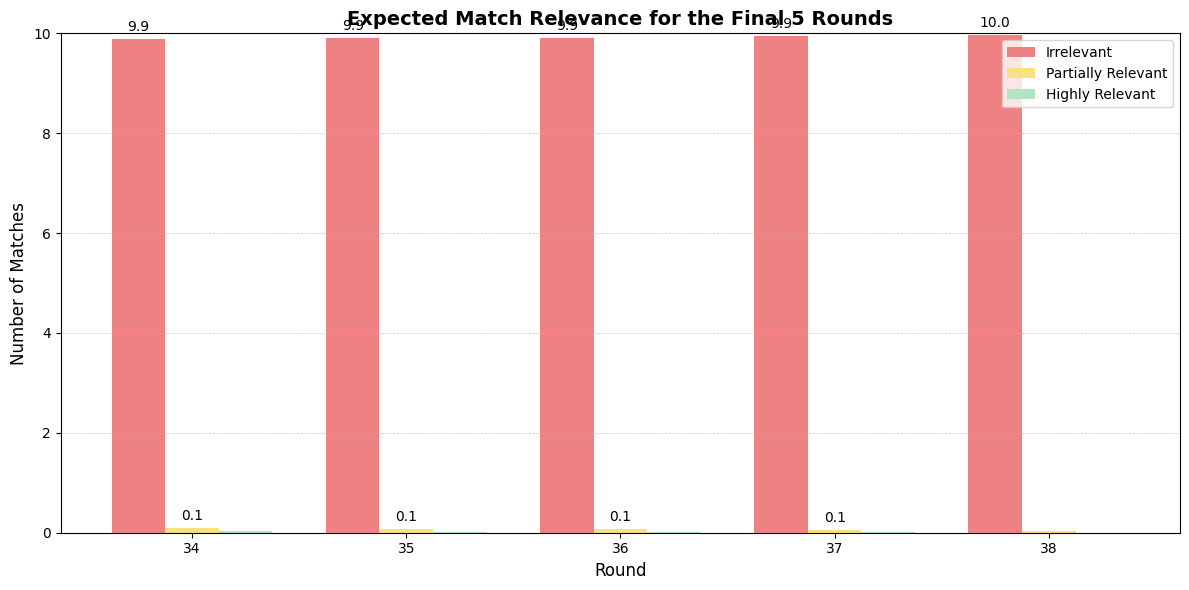

In [13]:
# Step 1: Merge for home team
match_relevances = last_round_matches.merge(
    bounds.rename(columns={'team': 'home_team', 'in_contention': 'home_relevant'}),
    on=['run', 'round', 'home_team'],
    how='left'
)

# Step 2: Merge for away team
match_relevances = match_relevances.merge(
    bounds.rename(columns={'team': 'away_team', 'in_contention': 'away_relevant'}),
    on=['run', 'round', 'away_team'],
    how='left'
)

match_relevances["relevance_type"] = match_relevances.apply(lambda x: x["home_relevant"] + x["away_relevant"], axis=1)
match_relevances.head()

match_relevances_per_round = {}

for i in range(34,39): 
    
    round_i = match_relevances[match_relevances["round"] == i]
    number_highly_relevant = len(round_i[round_i["relevance_type"] == 2]) / (len(bounds)/100)
    number_partially_relevant = len(round_i[round_i["relevance_type"] == 1]) / (len(bounds)/100)
    number_irrelevant = len(round_i[round_i["relevance_type"] == 0]) / (len(bounds)/100)
    
    match_relevances_per_round[i] = {
        "highly_relevant": number_highly_relevant,
        "partially_relevant": number_partially_relevant,
        "irrelevant": number_irrelevant
    }
    
    
rounds = list(match_relevances_per_round.keys())

labels = ['Irrelevant', 'Partially Relevant', 'Highly Relevant']
colors = ['#ee8283', '#f6e27f', '#b3e4c2']  # red, yellow, green (like your chart)

# Values
irrelevant = [match_relevances_per_round[r]['irrelevant'] for r in rounds]
partial = [match_relevances_per_round[r]['partially_relevant'] for r in rounds]
highly = [match_relevances_per_round[r]['highly_relevant'] for r in rounds]

x = np.arange(len(rounds))  # label locations
width = 0.25  # bar width

# Plot
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width, irrelevant, width, label='Irrelevant', color=colors[0])
bars2 = plt.bar(x, partial, width, label='Partially Relevant', color=colors[1])
bars3 = plt.bar(x + width, highly, width, label='Highly Relevant', color=colors[2])

# Add value labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0.05:
            plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, 
                     f'{height:.1f}', ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Axis and layout
plt.ylabel('Number of Matches', fontsize=12)
plt.xlabel('Round', fontsize=12)
plt.title('Expected Match Relevance for the Final 5 Rounds', fontsize=14, fontweight='bold')
plt.xticks(x, rounds)
plt.ylim(0, 10)
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [22]:
liverpool = bounds[(bounds["team"] == "Arsenal") & (bounds["round"] == 36)]
liverpool

,run,team,round,lowest,highest,in_contention
41,0,Arsenal,36,3,1,True
141,1,Arsenal,36,4,1,True
241,2,Arsenal,36,4,1,True
341,3,Arsenal,36,3,2,False
441,4,Arsenal,36,3,2,False
...,...,...,...,...,...,...
99541,995,Arsenal,36,2,2,False
99641,996,Arsenal,36,2,2,False
99741,997,Arsenal,36,2,2,False
99841,998,Arsenal,36,2,2,False


**Train the model**

In [49]:
bounds.head()

,run,team,round,lowest,highest,in_contention
0,0,Fulham,34,19,9,True
1,0,Liverpool,34,8,1,True
2,0,Arsenal,34,13,2,True
3,0,Chelsea,34,15,3,True
4,0,Tottenham,34,10,1,True


In [50]:
features.head()

,run,team,Points,Place,distance_to_1,distance_to_4,distance_to_7,distance_to_17,distance_to_20
0,0,Fulham,17,17,29,20,17,0,9
1,0,Liverpool,37,4,9,0,3,20,29
2,0,Arsenal,31,9,15,6,3,14,23
3,0,Chelsea,34,7,12,3,0,17,26
4,0,Tottenham,39,3,7,2,5,22,31


In [62]:
basetable.columns

Index(['run', 'team', 'Points', 'Place', 'distance_to_1', 'distance_to_4',
       'distance_to_7', 'distance_to_17', 'distance_to_20', 'round', 'lowest',
       'highest', 'in_contention'],
      dtype='object')

In [61]:
basetable = pd.merge(features, bounds, on = ["run", "team"], how = "right")
basetable

,run,team,Points,Place,distance_to_1,distance_to_4,distance_to_7,distance_to_17,distance_to_20,round,lowest,highest,in_contention
0,0,Fulham,17,17,29,20,17,0,9,34,19,9,True
1,0,Liverpool,37,4,9,0,3,20,29,34,8,1,True
2,0,Arsenal,31,9,15,6,3,14,23,34,13,2,True
3,0,Chelsea,34,7,12,3,0,17,26,34,15,3,True
4,0,Tottenham,39,3,7,2,5,22,31,34,10,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,999,Man United,28,12,22,11,5,14,22,38,5,5,False
99996,999,Brentford,37,6,13,2,4,23,31,38,8,6,True
99997,999,Wolverhampton,33,7,17,6,0,19,27,38,10,9,False
99998,999,Southampton,15,16,35,24,18,1,9,38,19,18,False


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import pandas as pd

# Define features and target
features = ["Points", "Place", "distance_to_1", "distance_to_4", 
            "distance_to_7", "distance_to_17", "distance_to_20", "round"]
target = "in_contention"

# Prepare feature matrix and target
X = basetable[features]
y = basetable[target].astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train logistic regression
clf_logit = LogisticRegression(max_iter=1000)
clf_logit.fit(X_train, y_train)

# Predict
y_pred = clf_logit.predict(X_test)
y_pred_proba = clf_logit.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      5703
           1       0.68      0.69      0.69      6297

    accuracy                           0.67     12000
   macro avg       0.66      0.66      0.66     12000
weighted avg       0.67      0.67      0.67     12000

Confusion Matrix:
[[3619 2084]
 [1929 4368]]
ROC AUC Score:
AUC: 0.728


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import pandas as pd

# Define features and target
features = ["Points", "Place", "distance_to_1", "distance_to_4", 
            "distance_to_7", "distance_to_17", "distance_to_20", "round"]
target = "in_contention"

# Drop duplicate "Points" from your original list
X = filtered[features]
y = filtered[target].astype(int)  # ensure it's 0/1

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train the model
clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68      5703
           1       0.71      0.75      0.73      6297

    accuracy                           0.71     12000
   macro avg       0.71      0.70      0.71     12000
weighted avg       0.71      0.71      0.71     12000

Confusion Matrix:
[[3735 1968]
 [1546 4751]]
ROC AUC Score:
AUC: 0.777


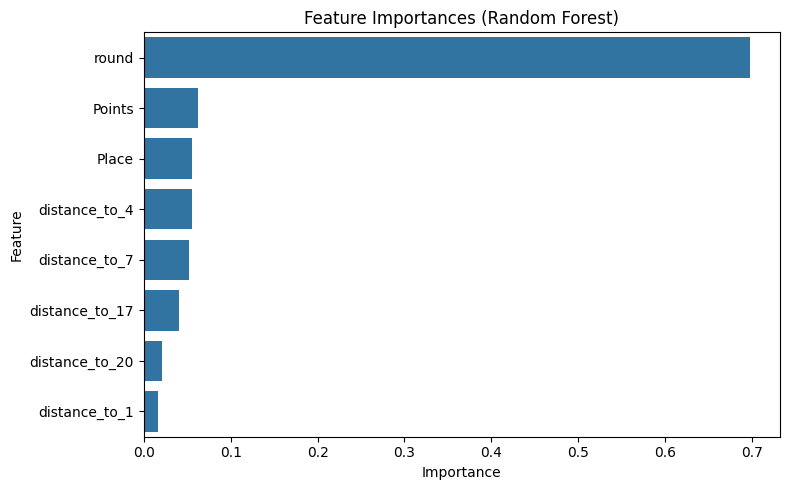

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Create DataFrame
feat_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=feat_df, x='importance', y='feature')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
